<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Thebest_GroupedBars_grasses_mixed_repetitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1078]:
#!pip install pillow

In [1079]:
import pandas as pd
import numpy as np

In [1080]:
import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

file_name_type = csv_file.split('_')[1]
print (csv_file, file_name_type)

sm_bca_2405_6_new.csv bca


In [1081]:
def try_read_csv(delimiter):
    df = pd.read_csv(csv_file, delimiter=delimiter, decimal='.', nrows=1)
    if df.columns[0] != 'species':
        raise pd.errors.ParserError("Incorrect delimiter")
    return pd.read_csv(csv_file, delimiter=delimiter, decimal='.')  # Връща df, ако делимитерът е правилен

In [1082]:
for delimiter in [';', '\t', ',']:
    try:
        df = try_read_csv(delimiter)
        break  # Излиза от цикъла, ако е намерен правилния делимитер
    except pd.errors.ParserError:
        pass  # Преминава към следващия делимитер
else:
    raise pd.errors.ParserError("Could not determine delimiter")  # Хвърля грешка, ако никой от делимитерите не е правилен

In [1083]:
# Convert 'rep1' and 'rep2' columns to numeric, handling errors
df['rep1'] = pd.to_numeric(df['rep1'], errors='coerce')
df['rep2'] = pd.to_numeric(df['rep2'], errors='coerce')

# Check for missing values in 'rep1' and 'rep2'
print(df.isnull().sum())
df = df.dropna();
print(df.isnull().sum())

species    0
month      0
method     0
rep1       0
rep2       0
dtype: int64
species    0
month      0
method     0
rep1       0
rep2       0
dtype: int64


In [1084]:
df

,species,month,method,rep1,rep2
0,La mono,21.V,PM,3.146343,3.456162
1,La mono,21.V,FRAP,2.700383,2.548404
2,La mono,21.V,Folin,2.839757,2.603110
3,La mixed,21.V,PM,3.787722,3.651836
4,La mixed,21.V,FRAP,2.700383,2.475719
5,La mixed,21.V,Folin,2.467884,2.129817
6,Hv mono,21.V,PM,3.244180,2.646285
7,Hv mono,21.V,FRAP,3.788466,3.856747
8,Hv mono,21.V,Folin,1.690331,1.572008
9,Hv mixed,21.V,PM,2.831089,2.744123


In [1085]:
df_long = pd.melt(df, id_vars=['species', 'month', 'method'], value_vars=['rep1', 'rep2'], var_name='replicate', value_name='value')

In [1086]:
value = 'value'
variant = 'species'

if file_name_type == 'bca': # bca / chl
  mth = 'PM'
  var1 = 'method'
  var2 = 'species'
  y_pos_m = .7
elif file_name_type == 'chl':
  mth = 'chl a'
  var1 = 'species'
  var2 = 'method'
  y_pos_m = 50
else:
  print ("wrong csv type!")



condition = (df_long['method'] == mth) & (df_long['month'] == 'morning')

import statsmodels.stats.multicomp as mc

def multi_comparison(dataVariant):
  list_unique = dataVariant[variant].unique().tolist()

  model = mc.MultiComparison(dataVariant[value].astype('float'), dataVariant[variant])
  result = model.tukeyhsd()
  return result, list_unique

In [1087]:
print(df_long.dtypes)

species       object
month         object
method        object
replicate     object
value        float64
dtype: object


In [1088]:
#result, list_unique = multi_comparison(df_long[condition])

In [1089]:
def letter_ordering(df_ltr, thsd, list_u):
  new_df_ltr = np.array(df_ltr.sum(axis=1))
  new_ltr = []

  # ORDERING OF THE LETTERS!!!
  for i in range(len(list_u)):
    ltr = [list_u[i], thsd.groupsunique.tolist().index(list_u[i]),
    new_df_ltr[thsd.groupsunique.tolist().index(list_u[i])]]
    new_ltr.append(ltr[2])
    print(ltr)
  #print(np.array(df_ltr.sum(axis=1)), new_ltr)
  return new_ltr

In [1090]:
import scipy.stats as stats

def letters_calculate(col_to_group, col_for_data, data, list_u):
  #Now take teh data and regroup for anova
  samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]
  #samples = np.asarray(samples).astype('float')
  #print (np.asarray(samples).astype('float'))
  #I am not sure how this works but it makes an numpy array for each group
  print(samples)
  f_val, p_val = stats.f_oneway(*samples)
  # I am not sure what this star does but this passes all the numpy arrays correctly

  # this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
  #if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
  mod = mc.MultiComparison(data[col_for_data].astype('float'), data[col_to_group])
  thsd=mod.tukeyhsd()

  #this is a function to do Piepho method.
  #AN Alogrithm for a letter based representation of al-pairwise comparisons.
  tot=len(thsd.groupsunique)
  #make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
  df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
  #df_ltr.iloc[:,0]=1
  df_ltr[df_ltr.columns[0]] = 1
  #df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

  count=0
  df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])
  # I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference
  for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
      for j in np.arange(i+1,tot):
          #print('i=',i,'j=',j,thsd.reject[count])
          if thsd.reject[count]==True:
              for cn in np.arange(tot):
                  if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                    #If the column contains both i and j shift and duplicat
                      df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                      df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                      df_ltr.iloc[i,cn]=0
                      df_ltr.iloc[j,cn+1]=0
                  #Now we need to check all columns for abosortpion.
                  for cleft in np.arange(len(df_ltr.columns)-1):
                      for cright in np.arange(cleft+1,len(df_ltr.columns)):
                          if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                              if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                  df_ltr[df_ltr.columns[cright]]=0
                                  df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                              if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                  df_ltr[df_ltr.columns[cleft]]=0
                                  df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

          count+=1

  #I sort so that the first column becomes A
  df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

  # I assign letters to each column
  for cn in np.arange(len(df_ltr.columns)):
      df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
      df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
      df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')
      #print(df_ltr.columns[cn])

  #I put all the letters into one string
  df_ltr=df_ltr.astype(str)
  df_ltr.sum(axis=1)

  letter_order = letter_ordering(df_ltr, thsd, list_u)
  #print (letter_order, list_u)
  return letter_order, df_ltr

In [1091]:
month = pd.unique(df['month'].values).tolist()
method = pd.unique(df['method'].values).tolist()
species = pd.unique(df['species'].values).tolist()
combinations = np.array(np.meshgrid(month, method)).T.reshape(-1, 2)

In [1092]:
stat_result = df_long.groupby(['species','method','month'], as_index=False, sort=False).agg({value:['mean','std']})
menMeans = stat_result['value']['mean']
menStd = stat_result['value']['std']

In [1093]:
column_names = df.columns.values
print(column_names)  # To see the output, run the code.

['species' 'month' 'method' 'rep1' 'rep2']


In [1094]:
if True:
  var_1 = column_names[1]
  var_2 = column_names[0]
  var1_labels = locals()[var_1] # Ще бъде 'method'
  var2_labels = locals()[var_2] # Ще бъде 'month'
  variant = column_names[2]
  combinations = np.array(np.meshgrid(var1_labels, var2_labels)).T.reshape(-1, 2)

# Създаване на combined колона
df_long['combined'] = df_long[var_1] + df_long[variant]

# Получаване на списък с уникални стойности в combined колоната
unique_combined_values = df_long['combined'].unique().tolist()

# Функция за изчисляване на букви за всяка група
def calculate_letters_for_group(group):
  return letters_calculate('combined', value, group, unique_combined_values)

# Изчисляване на букви за всяка species група
# Този подход използва groupby за групиране по species
# и след това прилага функцията calculate_letters към всяка група.
# Резултатите се запазват в речник letters_by_species.

letters_by_species = df_long.groupby(var_2).apply(calculate_letters_for_group).to_dict()

[34    3.471292
70    3.797277
Name: value, dtype: float64, 35    1.064909
71    1.183232
Name: value, dtype: float64, 33    3.331147
69    3.396372
Name: value, dtype: float64, 10    4.015334
46    4.136476
Name: value, dtype: float64, 11    1.487492
47    1.555105
Name: value, dtype: float64, 9     2.831089
45    2.744123
Name: value, dtype: float64, 22    3.407417
58    3.834721
Name: value, dtype: float64, 23    1.149425
59    1.014199
Name: value, dtype: float64, 21    2.836525
57    2.858266
Name: value, dtype: float64]
['21.VPM', 5, 'e']
['21.VFRAP', 3, 'b']
['21.VFolin', 4, 'c']
['28.VPM', 8, 'de']
['28.VFRAP', 6, 'ab']
['28.VFolin', 7, 'c']
['14.VIPM', 2, 'ad']
['14.VIFRAP', 0, 'ab']
['14.VIFolin', 1, 'c']
[31    3.178347
67    3.028570
Name: value, dtype: float64, 32    0.811359
68    0.743746
Name: value, dtype: float64, 30    2.880008
66    2.945233
Name: value, dtype: float64, 7     3.788466
43    3.856747
Name: value, dtype: float64, 8     1.690331
44    1.572008
Name: va

<ipython-input-1094-c5edc5e9e779>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  letters_by_species = df_long.groupby(var_2).apply(calculate_letters_for_group).to_dict()


In [1095]:
result_values = {}
result_errors = {}
new_ltr = {}
i = 1

for v1 in var1_labels:
  for v2 in var2_labels:

    result_values[f'y{i}'] = stat_result[stat_result[var_1] == v1]\
     [stat_result[var_2] == v2]['value']['mean'].values

    result_errors[f'y{i}err'] = stat_result[stat_result[var_1] == v1]\
     [stat_result[var_2] == v2]['value']['std'].values

    condition = (df_long[var_1] == v1) & (df_long[var_2] == v2)
    list_unique = df_long[condition][variant].unique().tolist()
    print (result_values)
    print (df_long[condition].dtypes, list_unique)
    #new_ltr[f'y{i}'], _ = letters_calculate(variant, value, df_long[condition], list_unique)

    i += 1
print (result_values)

{'y1': array([3.30125232, 2.62439385, 2.7214334 ])}
species       object
month         object
method        object
replicate     object
value        float64
combined      object
dtype: object ['PM', 'FRAP', 'Folin']
{'y1': array([3.30125232, 2.62439385, 2.7214334 ]), 'y2': array([3.7197791 , 2.588051  , 2.29885057])}
species       object
month         object
method        object
replicate     object
value        float64
combined      object
dtype: object ['PM', 'FRAP', 'Folin']
{'y1': array([3.30125232, 2.62439385, 2.7214334 ]), 'y2': array([3.7197791 , 2.588051  , 2.29885057]), 'y3': array([2.94523278, 3.82260639, 1.63116971])}
species       object
month         object
method        object
replicate     object
value        float64
combined      object
dtype: object ['PM', 'FRAP', 'Folin']
{'y1': array([3.30125232, 2.62439385, 2.7214334 ]), 'y2': array([3.7197791 , 2.588051  , 2.29885057]), 'y3': array([2.94523278, 3.82260639, 1.63116971]), 'y4': array([2.78760581, 4.075905  , 1.521298

<ipython-input-1095-15cb6662304e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_values[f'y{i}'] = stat_result[stat_result[var_1] == v1]\
<ipython-input-1095-15cb6662304e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_errors[f'y{i}err'] = stat_result[stat_result[var_1] == v1]\
<ipython-input-1095-15cb6662304e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_values[f'y{i}'] = stat_result[stat_result[var_1] == v1]\
<ipython-input-1095-15cb6662304e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_errors[f'y{i}err'] = stat_result[stat_result[var_1] == v1]\
<ipython-input-1095-15cb6662304e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_values[f'y{i}'] = stat_result[stat_result[var_1] == v1]\
<ipython-input-1095-15cb6662304e>:12: UserWarning: Boolean Series key will be reindexed to match 

```
# water extracts
y1w = [1.02809021335807, 0.730954313543599, 0.930252782931354, 0.701965445269017, 0.701965445269017, 0.923005565862709, 1.13679846938776]
y2w = [0.875898654916512, 0.923005565862709, 1.19839981447124, 0.792555658627087, 0.767190398886828, 0.53890306122449, 0.803426484230056]

csv_file = '/content/gr_BCA_all_240826_w.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv
dfw = pd.read_csv(csv_file, delimiter='\t', decimal=',') # delimiter '\t' or ';'

y1w = dfw['y1w'].values
y2w = dfw['y2w'].values
y1werr = dfw['y1werr'].values
y2werr = dfw['y2werr'].values
```

In [1096]:
def draw_letters(y, xx, data, new_l, follow_bars=False, bplt=0, fsize=10, i_bar_width=0.1):

  for i, grp in enumerate(pd.unique(data)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[i] + y_pos_m #+ y * 0.25
      else:
        y_pos = y * 20.98 #y_pos = ax.get_ylim()[1]*1

      #print (i, xx, y_pos, new_l[i], pd.unique(data))
      plt.text(i*i_bar_width+xx+bplt, y_pos, new_l[i],
              rotation=90, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [1097]:
import itertools
import re
iter_product = list(itertools.product(var1_labels, var2_labels)) # also combinations = [[x, y] for x in list1 for y in list2]
labels = np.array(iter_product)
labels = [re.sub(r'[\[\]\']', '', str(i)) for i in labels]

In [1098]:
if 'sm' in csv_file.lower():
  colors = [['blue', 'dodgerblue', 'lightblue', 'azure'],
            ['red', 'tomato', 'lightsalmon', 'blanchedalmond'],
            ['green', 'limegreen', 'yellowgreen', 'palegreen'],
            ['goldenrod', 'gold', 'yellow', 'cornsilk'],]
  #label = ['$\it{L. albus}$ mono', '$\it{L. albus}$ mixed',
  #       '$\it{H. vulgare}$ mono', '$\it{H. vulgare}$ mixed']

  if file_name_type == 'bca':
    y_label = 'GAE per FW [mM  mg$^{-1}$]'
  elif file_name_type == 'chl':
    y_label = 'pigments per FW [mg 100 g$^{-1}$]'

else:

  if file_name_type == 'bca': # bca / chl
    colors = ['blue', 'dodgerblue', 'lightblue', 'red', 'tomato', 'lightsalmon', 'green', 'limegreen', 'yellowgreen']
    y_label = 'GAE per FW [mM  mg$^{-1}$]'

  elif file_name_type == 'chl':
    colors = ['blue', 'lightblue', 'red', 'lightsalmon', 'green', 'yellowgreen', ]
    y_label = 'pigments per FW [mg 100 g$^{-1}$]'
  else:
    print ("wrong csv type!")

label = pd.unique(df[variant].values)

In [1099]:
def convert_1d_to_2d_index(index_1d, cols):
  """
  Преобразува индекс от едномерен масив в еквивалентния му индекс в двуизмерен масив.

  Args:
    index_1d: Индексът в едномерния масив.
    cols: Броят на колоните в двуизмерния масив.

  Returns:
    Кортеж, съдържащ индекса на реда и индекса на колоната в двуизмерния масив.
  """
  row_index = index_1d // cols
  col_index = index_1d % cols
  return row_index, col_index

In [1100]:
max_value = max(max(val) for val in result_values.values()) # Find the maximum value within each array and then find the overall maximum.
division_by = 1
if file_name_type == 'chl':
  division_by = 100
max_value = int(max_value*1.4/division_by)*division_by
y_nums = range(0,max_value,int(max_value/5*division_by)*division_by)
x = np.arange(len(pd.unique(df[variant].values))) # N of samples
i_bar_width = 0.025*len(x)

<ipython-input-1101-84750ade744d>:53: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend((), ncols=len(var1_labels), loc='upper left',


"\nfrom PIL import Image\n\n# Save the figure in RGB and close it\nplt.savefig('anovatest_rgb.jpg', dpi=600, bbox_inches='tight')\nplt.close()  # Close the figure\n\n# Open the image using Pillow\nimg = Image.open('anovatest_rgb.jpg')\n\n# Convert to CMYK\nif img.mode != 'CMYK':\n  img = img.convert('CMYK')\n\n# Save the image in CMYK with 600 DPI\nimg.save('anovatest_cmyk.jpg', dpi=(600, 600))\n"

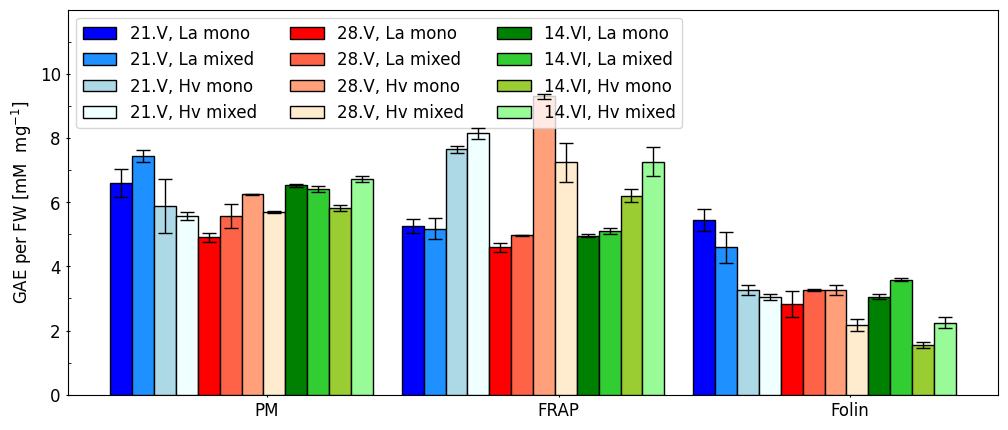

In [1101]:
import matplotlib.pyplot as plt
# create data

fig, ax = plt.subplots(figsize=(12, 5))
bar_kwargs = {'width':i_bar_width,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type

xx = -0.5
for i, y in enumerate(result_values):
  row_index, col_index = convert_1d_to_2d_index(i, len(var2_labels))
  plt.bar(x+xx, result_values[y], color=colors[row_index][col_index],
          yerr=result_errors[y + 'err'], **bar_kwargs,  error_kw=err_kwargs)
  xx += i_bar_width

"""
new_result_values = {}
xx = -0.5
for i, v in enumerate(df[var_1].unique()):
  new_result_values[v] = []
  for j, (month, method) in enumerate(combinations):
    key = f'y{j+1}'
    new_result_values[v].append(result_values[key][i]+result_errors[key+'err'][i])

#print(letters_by_species, new_result_values)

for v in df_long[var_2].unique().tolist():
  print (letters_by_species[v][0], new_result_values[v])
  draw_letters(10, xx, new_result_values[v], letters_by_species[v][0],
               True, 0, fsize=10, i_bar_width=i_bar_width)
  xx += 1.
"""
#p1w = plt.bar(x-0.3, y1w, bottom=result_values['y1'], color='violet', yerr=y1werr, **bar_kwargs,  error_kw=err_kwargs)

#p2w = plt.bar(x-0.2, y2w, bottom=result_values['y2'], color='violet', yerr=y2werr, **bar_kwargs,  error_kw=err_kwargs)

# Redrawing of the y-axis:
plt.yticks(y_nums, [round(i*2) for i in y_nums])
plt.ylim(0, max_value)
#plt.yticks([0,2,4,6,8,10,12], [0,15,30,45,60,75,90])
# minor ticks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.yaxis.set_minor_locator(MultipleLocator(y_nums[1]/2))
ax.tick_params(which="major", direction="inout")
ax.tick_params(which="minor", direction="in")

plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12, fontstyle='normal')

plt.ylabel(y_label)
           # ncols=len(var1_labels) броя на колоните е равен на броя на
           # елементите от масива var1_labels (първият критерий на сортиране)
plt.legend((), ncols=len(var1_labels), loc='upper left',
           # automatic labeling
           labels=[re.sub(r'[\[\]\']', '', str(i)) for i in combinations.tolist()])

plt.savefig(csv_file.split('.')[0]+ '_' + var_1 + '_' + var_2 + '_' + variant + '.jpg',
            dpi=600,bbox_inches='tight')

"""
from PIL import Image

# Save the figure in RGB and close it
plt.savefig('anovatest_rgb.jpg', dpi=600, bbox_inches='tight')
plt.close()  # Close the figure

# Open the image using Pillow
img = Image.open('anovatest_rgb.jpg')

# Convert to CMYK
if img.mode != 'CMYK':
  img = img.convert('CMYK')

# Save the image in CMYK with 600 DPI
img.save('anovatest_cmyk.jpg', dpi=(600, 600))
"""